Importar

In [248]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing as ps
from sklearn.model_selection import KFold,cross_val_score, learning_curve, ShuffleSplit
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score


In [249]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Reds):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig=plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [250]:
data = pd.read_csv("dataEncode.csv")
data.columns.values
dt = DecisionTreeRegressor()

In [251]:
cross_val_score(dt, data.iloc[:,1:], data.loc[:,"DiasEstanciaClinica_exactoLog"], cv=5)

array([0.62289883, 0.61287655, 0.61031509, 0.64186841, 0.64956619])

In [252]:
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,1:] , data.loc[:,"DiasEstanciaClinica_exactoLog"], random_state=0, test_size = 0.2)
print("Train dataset:",X_train.shape, y_train.shape)
print("Taset dataset:",X_test.shape, y_test.shape)

Train dataset: (34523, 9) (34523,)
Taset dataset: (8631, 9) (8631,)


In [253]:
dt = DecisionTreeRegressor(max_depth=5)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.7281675785960351

['DiasEstanciaServicio', 'Antioboticos', 'Transfusiones', 'UCI_UCE', 'ClasificacionCronico_DX_pre_cx', 'DX_pos_cx', 'ClasificacionCronico_DX_pos_cx', 'DX_pre_cx', 'DX_R3']
Feature Importances: [8.23402816e-01 1.14961056e-02 5.09548297e-03 1.46611730e-01
 0.00000000e+00 7.26287097e-04 0.00000000e+00 1.26675789e-02
 0.00000000e+00]


<BarContainer object of 9 artists>

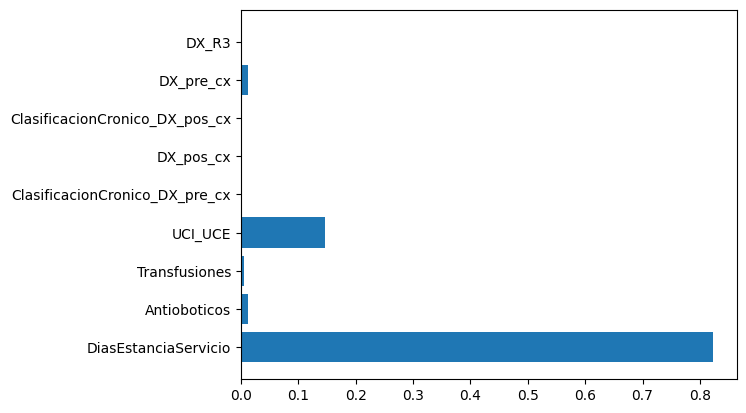

In [254]:
names = data.columns.values.tolist()
names.remove("DiasEstanciaClinica_exactoLog")
print(names)
print('Feature Importances:',dt.feature_importances_)
plt.barh(names , dt.feature_importances_ )

In [255]:
preds = dt.predict(X_test)
print("RMSE: ", np.sqrt(mean_squared_error(y_test,preds)))


RMSE:  0.5220760473359792


In [256]:
from sklearn.tree import DecisionTreeRegressor
print("Train score: ", dt.score( X_train , y_train))
print("Test score: ", dt.score(X_test , y_test))

Train score:  0.7303704789971031
Test score:  0.7281675785960351


In [257]:
def lc_plot(estimator,X,y,testsais):
    train_sizes, train_scores, valid_scores = learning_curve(estimator, X, y, train_sizes= [0.3, 0.5,0.7,0.9], 
                 scoring ='neg_root_mean_squared_error', cv = ShuffleSplit(n_splits=10, test_size=testsais))
    
    train_scores = np.abs(train_scores)
    valid_scores = np.abs(valid_scores)

    train_mean = np.mean(train_scores, axis=1)

    valid_mean = np.mean(valid_scores, axis=1)

    plt.subplots(1, figsize=(5,5))
    plt.plot(train_sizes, train_mean, '--', color="r",  label="Training score")
    plt.plot(train_sizes, valid_mean, color="g", label="Cross-validation score")



    plt.grid()
    plt.title("Learning Curve")
    plt.xlabel("Training Set Size"), plt.ylabel("RMSE"), plt.legend(loc="best")
    plt.tight_layout()
    plt.show()
    return plt

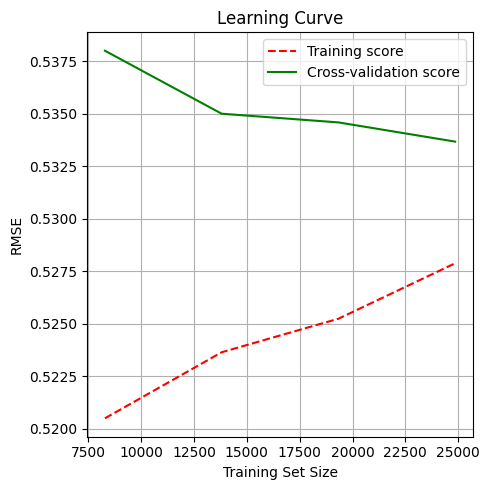

<module 'matplotlib.pyplot' from 'C:\\Users\\acoun\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python311\\site-packages\\matplotlib\\pyplot.py'>

In [258]:
lc_plot(dt,X_train,y_train,0.2)

In [259]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':[ None, 1, 3 , 5 , 10 , 20] }
dt = DecisionTreeRegressor(random_state=0)
clf = GridSearchCV(dt, parameters , cv=5 , verbose=3)
clf.fit(X_train, y_train)
clf.best_estimator_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....................max_depth=None;, score=0.562 total time=   0.2s
[CV 2/5] END ....................max_depth=None;, score=0.607 total time=   0.1s
[CV 3/5] END ....................max_depth=None;, score=0.623 total time=   0.1s
[CV 4/5] END ....................max_depth=None;, score=0.629 total time=   0.1s
[CV 5/5] END ....................max_depth=None;, score=0.636 total time=   0.2s
[CV 1/5] END .......................max_depth=1;, score=0.397 total time=   0.0s
[CV 2/5] END .......................max_depth=1;, score=0.417 total time=   0.0s
[CV 3/5] END .......................max_depth=1;, score=0.390 total time=   0.0s
[CV 4/5] END .......................max_depth=1;, score=0.412 total time=   0.0s
[CV 5/5] END .......................max_depth=1;, score=0.415 total time=   0.0s
[CV 1/5] END .......................max_depth=3;, score=0.665 total time=   0.0s
[CV 2/5] END .......................max_depth=3;,

DecisionTreeRegressor(max_depth=5, random_state=0)